<a href="https://www.kaggle.com/code/henriqueheisszappe/predict-spy-multiple-linear-regression-model?scriptVersionId=153633193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Welcome! Bem vindos! Bienvenidos! Benvenuti!

I am very happy to present my first, end-to-end python project.

If you have any insights and any advice on how I can improve this project, please be welcome to send me a message or comment in this notebook :)

If you want to get to know me better, links to my Website and LinkedIn are on my profile :D

First thing I will do is make this notebook look the way I personally like it hehe

In [1]:
from IPython.display import display, HTML

# Define your CSS style
css_style = """
<style>
  h1, h2, h3, h4, h5, h6 {
    color: #ff5800;
  }
</style>
"""

# Apply the style using IPython's HTML function
display(HTML(css_style))

This piece of code above doesn't seem to work in Kaggle neither in GitHub. In Jupyter Notebook, it turns all headings to orange. If you run this code in Kaggle editor it works. Just the output does not show the orange color.


## Goals

The main goal of this project is to showcase my data analysis skills, applied to finance.

The following technical and non-technical skills will be addressed:

1. Documentation
2. Finance
3. Statistics
4. Visualization
5. Soft Skills
6. Python (hehe)
7. Simplifying capabilities

## Summary

This project aims to create a **Multiple Linear Regression Model**, focusing on indexes influences on the index fund 'SPY'.

We are going to create a trading strategy based on: 

*"Predicting the open price price for SPY, applying a signal trading strategy, having in mind global indexes from the U.S, Europe and Asia. If the signal is positive, we stay long. If the signal is negative, we stay short."*

If you don't know what this means, do not worry. I will explain all concepts in this project.

We will go above and beyond, as I will try to explain this project for a real beginner (make the complex simple). Also, we will hypothetically present the project to stakeholders, filtering the most relevant data and choosing the best visualization tool.

**THIS IS NOT AN INVESTMENT RECOMMENDATION.**

## Dataset

We are going to import and analyze data from Yahoo Finance, using the 'yfinance' package.

The 8 indices we will use to train and test our hypothesis to predict 'SPY' are listed below.

#### Asia

**1. AORD**: the All Ordinaries is designed to measure the 500 largest companies in the Australian equities market, drawn from eligible companies listed on the Australian Securities Exchange.

**2. Nikkei 225**: widely used globally as representative indicators of the Japanese equity market.

**3. HSI**: freefloat-adjusted market-capitalization-weighted stock-market index in Hong Kong.

#### U.S

**4. SP500**: stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States.

**5. NASDAQ**: The Nasdaq Composite is a stock market index that includes almost all stocks listed on the Nasdaq stock exchange.

**6. Dow Jones**: stock market index of 30 prominent companies listed on stock exchanges in the United States.

#### Europe

**7. CAC 40**: The index represents a capitalization-weighted measure of the 40 most significant stocks among the 100 largest market caps on the Euronext Paris.

**8. DAX**: The DAX is a stock market index consisting of the 40 major German blue chip companies trading on the Frankfurt Stock Exchange.

The information about each index were taken mostly from Wikipedia.

# Project Index

### - The multiple linear regression model
### 1. Packages
### 2. Create Dataframes
### 3. Training and Testing the data
### 4. The Trading Strategy
### 5. The sharpe ratio and the maximum drawdown
### 6. Conclusion

# - The multiple linear regression model

The multiple linear regression model is a way to predict a result based on several factors working together. For example, if we had a race between 5 different cars, we would try to see how fast they would go (prediction) considering multiple factors (such as motor, gas input, aerodesign and potency). The linear aspect of the model means we believe that a better motor and a better aerodesign will increase how faster the car goes in a linear way.

#### **The multiple linear regression model equation is**

*y = b + a1x1 + a2x2 + a3x3 (...)*

# 1. Packages

We are going to be using a few packages for our project:

In [2]:
# Pandas for data manipulation and analysis

# Importing pandas as pd
import pandas as pd

# Statsmodels for statistical formulas and tests

# Importing statsmodels formula
import statsmodels.formula.api as smf

# Numpy to work with arrays

# Importing numpy as np
import numpy as np

# Import matplotlib for data visualization

# Importing matplotlib as plt for plots

import matplotlib.pyplot as plt
%matplotlib inline

# Importing datetime, for time stamps

import datetime
from datetime import date

# To export as an HTML file
import plotly.io as pio
pio.renderers.default = 'notebook'

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 1.1 Importing data from Yahoo Finance
We will use Yahoo Finance API to get access to the financial data they have available.
This way we make sure we are using current data.

In [3]:
%%capture
# import 'yfinance' API

!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf

### 1.1.1 Indexes
Now we will retrieve the data we want from Yahoo Finance.

The first thing we will do is to store the data we want using its respective ticker.

In [4]:
# The Tickers were found at Yahoo Finance

# Asia

# AORD - All ordinary
aord_ticker = yf.Ticker("^AORD")

# Nikkei
nikkei_ticker = yf.Ticker("^N225")

# HSI
hsi_ticker = yf.Ticker("^HSI")

# U.S markets

# SPY
spy_ticker = yf.Ticker("SPY")

# SP500
sp500_ticker = yf.Ticker("^GSPC")

# NASDAQ
nasdaq_ticker = yf.Ticker("^IXIC")

# Dow Jones
dji_ticker = yf.Ticker("^DJI")

# Europe

# CAC 40
cac40_ticker = yf.Ticker("^FCHI")

# DAX
dax_ticker = yf.Ticker("^GDAXI")

# 2. Create Dataframes

Time to get the historical data from each ticker and store as a dataframe.

We will work with the data in the 21st century.

In [5]:
# Defining the start period 

start = "2000-01-01"

# Defining the end period
# At my core project, I used the date.today() to find the current day
# Here, in the project, I will input the day I finished the project

end = "2023-12-04" 

# Store the historical data of AORD

aord = aord_ticker.history(start = start, end = end)

# Checking the outcome

# First five rows
aord.head()

# Last five rows
aord.head(-1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04 00:00:00+11:00,3152.500000,3152.500000,3122.399902,3124.100098,0,0.0,0.0
2000-01-05 00:00:00+11:00,3124.100098,3124.100098,3035.300049,3050.899902,0,0.0,0.0
2000-01-06 00:00:00+11:00,3050.899902,3075.399902,3026.000000,3030.100098,0,0.0,0.0
2000-01-07 00:00:00+11:00,3030.100098,3048.300049,3016.199951,3044.500000,0,0.0,0.0
2000-01-10 00:00:00+11:00,3044.500000,3111.500000,3044.500000,3103.100098,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-24 00:00:00+11:00,7234.200195,7268.100098,7233.399902,7244.100098,691793500,0.0,0.0
2023-11-27 00:00:00+11:00,7244.100098,7257.600098,7192.799805,7192.799805,829412100,0.0,0.0
2023-11-28 00:00:00+11:00,7192.799805,7255.399902,7191.000000,7223.100098,1012974100,0.0,0.0


It worked with AORD! Time to do the same with the other tickers.

We can also see that our data has 7 columns: Open, High, Low, Close, Volume, Dividends and Stock Splits

In this case we see that 'Date' is actually the index.

We also notice that the index is in this format: yyyy-mm-ddThh:mm:ss.s+zzzzzz

Next step is to get the history data from the other indexes.

In [6]:
# Applying for the rest of the indexes in the model

# Asia
nikkei = nikkei_ticker.history(start = start, end = end)
hsi = hsi_ticker.history(start = start, end = end)

# U.S
spy = spy_ticker.history(start = start, end = end)
sp500 = sp500_ticker.history(start = start, end = end)
nasdaq = nasdaq_ticker.history(start = start, end = end)
dji = dji_ticker.history(start = start, end = end)

# EU
cac40 = cac40_ticker.history(start = start, end = end)
dax = dax_ticker.history(start = start, end = end)

## 2.1 The timezone issue

Since we have different time zones and the data includes the hour and timezone, we need to transform the date to year/month/day so we can perform calculations later.

In [7]:
# Changing the index so we can perform calculations later

# Convert to index using a specific date format with pandas.to_datetime() and strftime()

aord.index = pd.to_datetime(aord.index).strftime('%Y-%m-%d')
nikkei.index = pd.to_datetime(nikkei.index).strftime('%Y-%m-%d')
hsi.index = pd.to_datetime(hsi.index).strftime('%Y-%m-%d')
spy.index = pd.to_datetime(spy.index).strftime('%Y-%m-%d')
sp500.index = pd.to_datetime(sp500.index).strftime('%Y-%m-%d')
nasdaq.index = pd.to_datetime(nasdaq.index).strftime('%Y-%m-%d')
dji.index = pd.to_datetime(dji.index).strftime('%Y-%m-%d')
cac40.index = pd.to_datetime(cac40.index).strftime('%Y-%m-%d')
dax.index = pd.to_datetime(dax.index).strftime('%Y-%m-%d')

# Now when we can perform calculation because the dataframe we'll build will match the indexes together.
# The would not be possible with different timezones

### 2.2 Predictors

Since we are dealing with predictors that are positioned in different timezones and markets open and close in different hours, we should have different calculations depending on the location.

#### Asian Markets -  same day 

- AORD: Close - Open
- Nikkei: Close - Open
- HSI: Close - Open

#### U.S Market - one day lag variable
- SPY: Open - Open Last Day
- SP500: Open - Open Last Day
- NASDAQ: Open - Open Last Day
- Dow Jones: Open - Open Last Day

#### EU Markets - one day lag variable

Ideally we should use the price at noon minus open price
This model can be improved using intraday data.

- CAC40: Open - Open Last Day
- DAX: Open - Open Last Day

### Response

The response variable is the expected effect

SPY: Open Next Day - Open


The following code creates a new dataframe 'panel' with the calculations above

In [8]:
# Creating the DataFrame with our calculations

panel = pd.DataFrame(index = spy.index) # here you can use any of the tickers. I chose SPY because it is what we want to predict.

# Asia
panel['aord'] = aord['Close'] - aord['Open']
panel['hsi'] = hsi['Close'] - hsi['Open']
panel['nikkei'] = nikkei['Close'] - nikkei['Open']

# U.S
panel['spy'] = spy['Open'].shift(-1) - spy['Open']
panel['sp500'] = sp500["Open"] - sp500['Open'].shift(1)
panel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
panel['dji'] = dji['Open'] - dji['Open'].shift(1)

# Europe
panel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
panel['daxi'] = dax['Open'] - dax['Open'].shift(1)

# Response - The response variable is the expected effect
panel['spy_lag1'] = panel['spy'].shift(1)

# SPY Open Price
panel['Price'] = spy['Open']

In [9]:
# Checking the result
panel.head()

,aord,hsi,nikkei,spy,sp500,nasdaq,dji,cac40,daxi,spy_lag1,Price
Date,,,,,,,,,,,
2000-01-03,NaN,311.931641,NaN,-3.058442,NaN,NaN,NaN,NaN,NaN,NaN,96.085458
2000-01-04,-28.399902,-230.179688,65.410156,-2.329143,-14.030029,-166.189941,-152.099609,-102.149902,-214.479980,-3.058442,93.027015
2000-01-05,-73.200195,-761.831055,-460.958984,-0.202582,-55.799927,-165.649902,-360.379883,-400.399902,-161.390137,-2.329143,90.697872
2000-01-06,-20.799805,-788.839844,-405.740234,0.445564,2.689941,-19.910156,124.000000,-35.899902,-84.399902,-0.202582,90.495290
2000-01-07,14.399902,76.290039,-0.640625,3.848323,1.339966,-123.349854,133.689453,-62.050293,-11.510254,0.445564,90.940854


## 2.3 Data cleaning

Using the .shift() model to perform the calculation has created null or NaN (Not a Number) values.
We need to perform some data cleaning to work with this data.

For instance, some places might have more holidays than other places.

In [10]:
# Cleaning 'panel' dataframe

# Propagate last valid observation forward to next valid
panel = panel.fillna(method = 'ffill')

# Drop first row using dropna()
panel = panel.dropna()

# Checking nulls
panel.isnull().sum()

aord        0
hsi         0
nikkei      0
spy         0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
spy_lag1    0
Price       0
dtype: int64

In [11]:
# Checking the shape of our data
panel.shape

(6017, 11)

# 3. Training and testing our data

In [12]:
# Splitting the data to train and test

# Since stock data is very noisy, we will split it in half

# Building the model
train = panel.iloc[-6000:-3000, :]

# Testing the model to see if it can predict the future
test = panel.iloc[-3000:, :] 

print(train.shape, test.shape)

(3000, 11) (3000, 11)


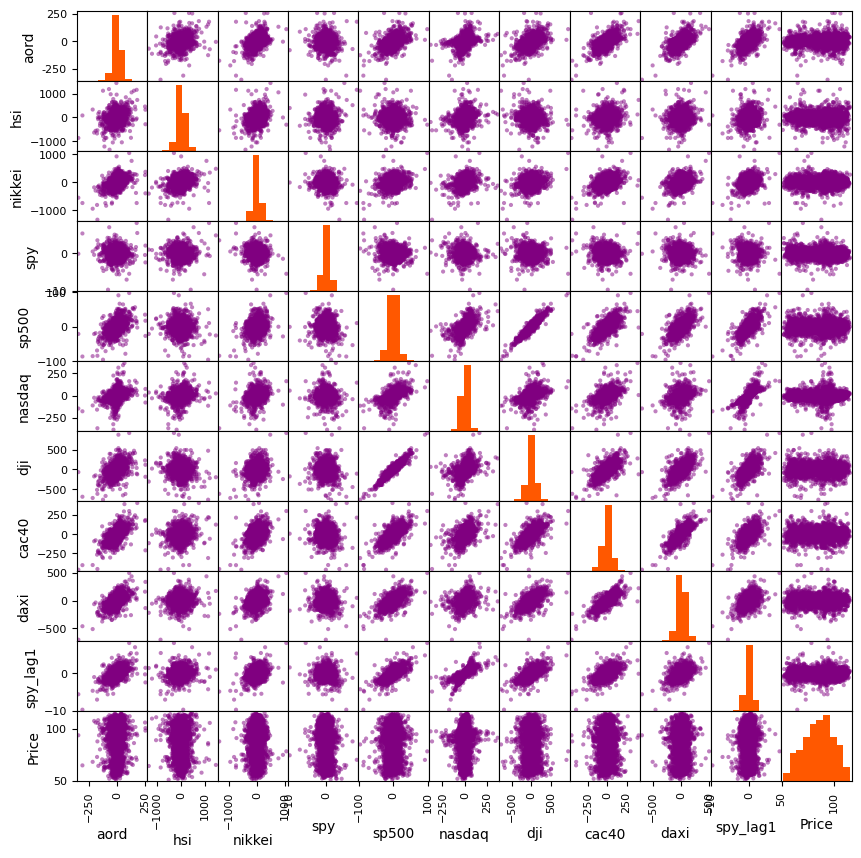

In [13]:
# Exploration on train data

# Using scatter matrix to get a sense of the train data
from pandas.plotting import scatter_matrix

# Change the color of the points so we make it our style hehe
sm = scatter_matrix(train, figsize=(10, 10), color='purple', diagonal='hist', hist_kwds={'color': '#ff5800'})

As we can see, there is no explicit pattern. This is consistent with noisy properties of stocks.

## 3.1 Correlation

Since there is no explicit pattern, we can compute the correlation to have a better understanding.

Correlation is about finding out patterns between two things that might not seen related.

For example, you might have a higher desire to go to the pool when the temperature is high. When it is cold, you tend to not go to the pool. It might exist a correlation between going to the pool and temperature.

It is important to emphasize that correlation does not imply causation.

In [14]:
# We can compute the correlation to have a better understanding
train.iloc[:, :-1].corr()['spy']

aord       -0.022409
hsi         0.052666
nikkei     -0.057231
spy         1.000000
sp500      -0.071720
nasdaq     -0.058381
dji        -0.071848
cac40      -0.053261
daxi       -0.045240
spy_lag1   -0.063565
Name: spy, dtype: float64

It seems DJI and SP500 have an association with SPY, but are negatively correlated.

It is important to note that the correlation is really close to 0, which indicates that the correlation is not that strong

## 3.2 The Ordinary Least Square (OLS) Regression

The OLS regression is basically a statistical method that helps us a relationship between a dependent variable with one or more independent variables. The main goal of the model is to find the best-fitting equation that can reduce the amount of squared errors between the observed and predicted values.

Imagine we have a bunch of balloons and they all have the same shape and size. We want to see how high they go depending on how much air they have. Each balloon will be an observed data point. The OLS model will try to minimize the distance between our regression line and the data points. Our goal is to find the line with the best fit. After finding the best-fitting line, we will be able to predict how high a balloon can go only by knowing how much air it has.

In [15]:
# Let's use the OLS method of StatsModels to build the multiple linear regression model
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi' # our OLS formula

# Calling the StatsModel package, defining the formula, the data and fitting
lm = smf.ols(formula = formula, data=train).fit() 

# Observe the result of our model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.284
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.50e-05
Time:                        22:46:10   Log-Likelihood:                -4510.2
No. Observations:                3000   AIC:                             9040.
Df Residuals:                    2990   BIC:                             9100.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0025      0.020      0.127      0.899      -0.037       0.042
spy_lag1      -0.0233      0.036     -0.651      0.515      -0.093       0.047
sp500          0.0016      0.005      0.308      0.758      -0.009       0.012
nasdaq        -0.0008      0.001     -1.059      0.289      -0.002       0.001
dji           -0.0004      0.001     -0.813      0.416      -0.002       0.001
cac40       3.982e-05      0.001      0.066      0.947      -0.001       0.001
aord           0.0007      0.001      0.995      0.320      -0.001       0.002
daxi       -9.236e-05      0.000     -0.214      0.830      -0.001       0.001
nikkei        -0.0005      0.000     -3.121      0.002      -0.001      -0.000
hsi            0.0004      0.000      3.594      0.000       0.000       0.001
==============================================================================
Omnibus:                      452.209   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4512.348
Skew:                          -0.383   Prob(JB):                         0.00
Kurtosis:                       8.959   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.2.1 P-Value
P-Value will indicate how consistent our sample is with the null hypothesis.
The null hypothesis will tell us if our predictors have effect on SPY or not.

F-Test is used for overall significance of the multiple linear equation model. If we reject null hypothesis, it means at least one of the predictors is useful.

If P value < 0.05, reject Null Hypothesis

Our P-Value is 1.50e-05 (2023/12/04), or 0.0000150. That means P-Value is indicating that our regression is not consistent with a null hypothesis. The investor can confidently conclude that at least one of our predictors is useful.

#### Significance of individual predictors or P>|t|

This data shows us that:

- Nikkei and HSI are < 0.05 which means they have high significance as individual predictors.

The numbers indicate that the other predictors might be not as significant. It might be due multicollinearity, since indexes tend to move in the same direction.

### 3.2.2 Durbin-Watson

This value is under 2.5 and over 1.5. This tells us that our result is normal. In other words, it means that there is no strong evidence that our residuals are positively or negatively correlated.

### 3.2.3 Checking Multicollinearity

This happens when two or more predictors are highly, linearly correlated.
One predictor can be predicted by the other with high accuracy.

In [16]:
# Checking multicollinearity
train.iloc[:, :-1].corr()

,aord,hsi,nikkei,spy,sp500,nasdaq,dji,cac40,daxi,spy_lag1
aord,1.000000,0.249089,0.402451,-0.022409,0.486417,0.363408,0.446181,0.610211,0.562373,0.514334
hsi,0.249089,1.000000,0.276575,0.052666,-0.013166,0.186579,-0.062564,0.156938,0.116850,0.167040
nikkei,0.402451,0.276575,1.000000,-0.057231,0.237156,0.257854,0.206600,0.394790,0.325434,0.291687
spy,-0.022409,0.052666,-0.057231,1.000000,-0.071720,-0.058381,-0.071848,-0.053261,-0.045240,-0.063565
sp500,0.486417,-0.013166,0.237156,-0.071720,1.000000,0.602191,0.949318,0.721331,0.658724,0.738398
nasdaq,0.363408,0.186579,0.257854,-0.058381,0.602191,1.000000,0.470743,0.521808,0.354878,0.773461
dji,0.446181,-0.062564,0.206600,-0.071848,0.949318,0.470743,1.000000,0.678719,0.635668,0.665308
cac40,0.610211,0.156938,0.394790,-0.053261,0.721331,0.521808,0.678719,1.000000,0.805552,0.603911
daxi,0.562373,0.116850,0.325434,-0.045240,0.658724,0.354878,0.635668,0.805552,1.000000,0.478044
spy_lag1,0.514334,0.167040,0.291687,-0.063565,0.738398,0.773461,0.665308,0.603911,0.478044,1.000000


For stock (which is noisy) the multicollinearity is quite expressive.

It is like analyzing three friends that are great in a swimming race. If you analyze the end result, it might hard for a trainer to understand who is really providing the results.

## 3.3 Real and Predicted Daily Change

In [17]:
# Real daily change
train['PredictedY'] = lm.predict(train)

# Predicted daily change
test['PredictedY'] = lm.predict(test)

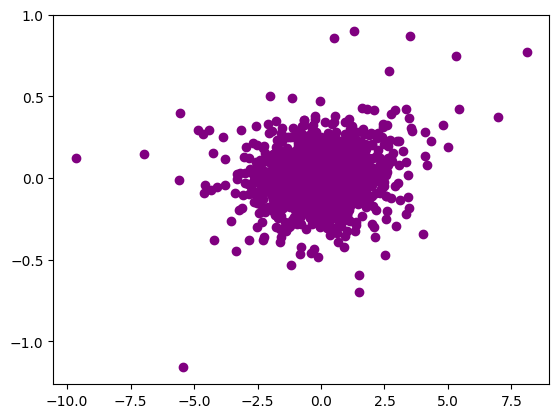

In [18]:
plt.scatter(train['spy'], train['PredictedY'], color = 'purple')

# 4. Model evaluation

Is our model worth pursuing and trading material?

We are going to evaluate our model with the following evaluators

##### 1. RMSE: Root-mean-square deviation

Square root of squared erros averaged by degrees of freedom (k is the number of predictors, which measure the prediction error)

##### 2. Adjusted R²

This will give the percentage of variation that can be explained by a model.

In [19]:
# Define adjustedMetric function, to calculate Adjusted R² and RMSE 
def adjustedMetric(data, model, model_k, yname):
    
    # Predicted values based on the dataframe input
    data['yhat'] = model.predict(data)
    
    # Total sum of squares equation, stored in SST
    SST = ((data[yname] - data[yname].mean())**2).sum()
    
    # Regression sum of squares, stored in SSR
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    
    # Sum of squared errors, stored in SSE
    SSE = ((data[yname] - data['yhat'])**2).sum()
    
    # Calculate R²
    r2 = SSR/SST 
    
    # Calculate the adjusted R²
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] - model_k -1)
    
    # Calculate the Root Mean Squared Error
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    
    # Get the adjusted R² and the RMSE
    return adjustR2, RMSE

In [20]:
# Defining the assessTable function

def assessTable(test, train, model, model_k, yname):
    
    # The following line calls the adjustedMetric function on the 'test' data
    # The 'data' = test, regression = 'model', number of predictors = 'model_k', dependent variable = 'yname'
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    
    # The following line calls the adjustedMetric function on the 'train' data
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    
    # Create a Pandas DataFrame. Define the index (rows) and columns.
    assessment = pd.DataFrame(index = ['R2', 'RMSE'], columns = ['Train', 'Test'])
    
    # Define the values of each column
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    
    # Show the Dataframe
    return assessment

In [21]:
# Call the assessTable function:


assessTable(test, train, # data = test and train, 
            lm, # model lm (linear model that we defined earlier)
            9, # number of predictors
            'spy' # dependent variable
           )

,Train,Test
R2,0.009760,0.004698
RMSE,1.089944,2.982924


#### Train and test results explained

##### R²
R² closer to 1 indicate a better fit of the model to the data.

##### RMSE
A perfect model would have RMSE value of '0'. Thus, the closer the results to '0', the better.

#### Train:
The R² result shows us that our model doesn't explain much of the variation in the training data. The RMSE Result shows us that our mode is actually performing quite well in terms of predicting accuracy in the training data.
#### Test:
The R² result shows us that our test is unable to explain much of the variance and unseen data. The RMSE from the Train and Test data have a quite gap between them. This suggests that our model is not that great in dealing with unseen data and it may be overfitted.

### Conclusion

It seems that our data is unable to explain much of the variance in the training and test data. Although the value of RMSE is very low to a very noisy data, the difference between the Train and Test RMSE might indicate overfitting and problems with predicting unseen data.

# 5. The Trading Strategy

We are going to create a simple trading strategy:

- When we have a positive signal: we are long;
- When we have a negative signal: we are short;

## 5.1 The signal

The first thing we are going to do is to get the signal from our predicted value from a response

### 5.1.1 The signal on the Train data

In [22]:
# If the predicted value is positive, return 1 (True), else -1.

# If negative, we will sell the share (or be short)
train['order'] = [1 if sig > 0 
                  else -1 
                  for sig in train['PredictedY']]

# Then, we  calculate the total profit
train['profit'] = train['spy'] * train['order']

# Finally, we sum the cumulative profit and store it in the 'Wealth' column
train['Wealth'] = train['profit'].cumsum()

# Seeing the total profit made with the model
print("Total profit made in train: ", train['profit'].sum())

Total profit made in train:  140.45735624639644


As we can see, our profit in the train data would be around 140 USD.

### 5.1.2 Repeating the signal on the Test data

In [23]:
# If the predicted value is positive, return 1 (True)

# If negative, we will sell the share (or be short)
test['order'] = [1 if sig > 0 
                 else -1 
                    for sig in test['PredictedY']]

# Then, we  calculate the total profit
test['profit'] = test['spy'] * test['order']

# Finally, we sum the cumulative profit and sum it in the 'Wealth' column
test['Wealth'] = test['profit'].cumsum()

# Seeing the total profit made with the model
print("Total profit made in test: ", test['profit'].sum())

Total profit made in test:  -216.63398985081645


    Our profit on most recent data would be actually a loss of 216 USD. (2023/12/04)
This goes hand in hand with the challenge it is for our model to predict unseen data, as seen before with R² and RMSE.

## 5.2 Comparing the 'signal-strategy' with the 'buy and hold strategy'

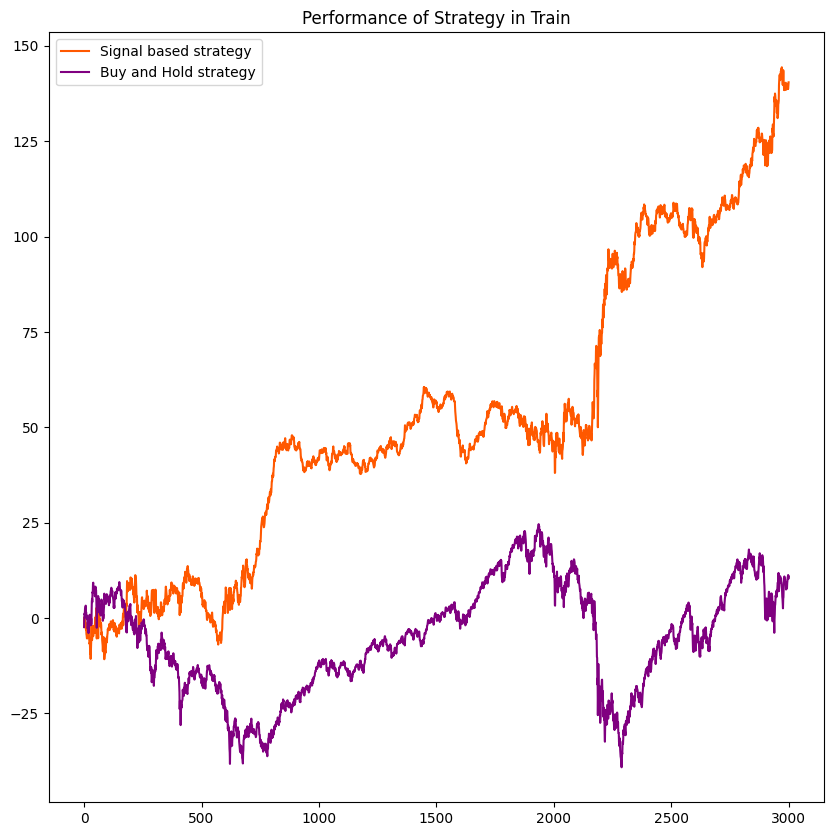

In [24]:
# Using the matplotlib library to generate a plot comparing our strategy with the 'buy and hold strategy', using the Train data. 

# Figure size and title
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')

# Signal strategy
plt.plot(train['Wealth'].values, color = '#ff5800', label = 'Signal based strategy')

# Buy and hold strategy
plt.plot(train['spy'].cumsum().values, color = 'purple', label = 'Buy and Hold strategy')

# Legends and plot
plt.legend()
plt.show()

The plot shows us that our signal strategy might be really profitable compared to the buy and hold strategy.

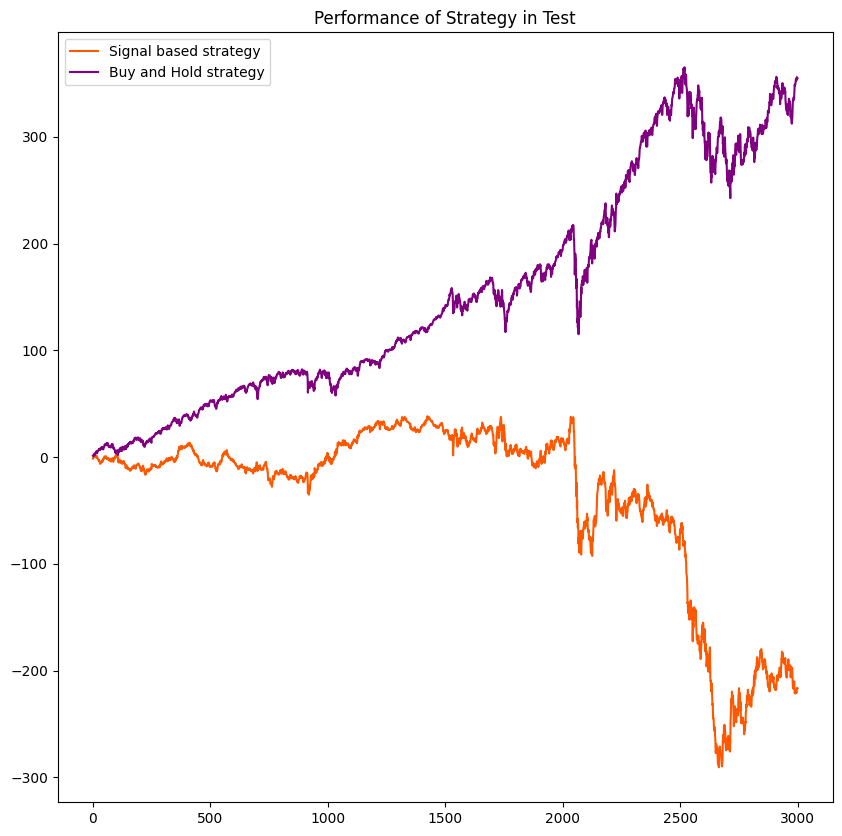

In [25]:
# Using the matplotlib library to generate a plot comparing our strategy with the 'buy and hold strategy', using the Test data. 

# Figure size and title
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Test')

# Signal strategy
plt.plot(test['Wealth'].values, color = '#ff5800', label = 'Signal based strategy')

# Buy and hold strategy
plt.plot(test['spy'].cumsum().values, color = 'purple', label = 'Buy and Hold strategy')

# Legends and plot
plt.legend()
plt.show()

In the test model, our results are very disappointing.
Our model is basically never profitable. 

The buy and hold strategy dominates our test signal strategy

## 5.3 The sharpe ratio and the maximum drawdown

### 5.3.1 Sharpe ratio

The sharpe ratio measure the excess return per unit of deviation. It is commonly known as risk.

It is equal to the mean of excess return divided by the standard deviation of excess return:
- Expected Excess Return (EER): Average Return - Risk-Free Rate
- Standard Deviation of Excess Return (SDR): StDev(Return)

- **Sharpe:** EER / SDR

In simple terms:
Imagine you want to buy a microphone to start recording videos. You will try to combine the best price with the best quality.

In our case, we want to choose the assets that can give us the best return but smartly choose the ones that will have less chance to make us loose money.

In [26]:
# First thing we have to do to calculate the sharpe ratio is to add the initial investment to the 'Wealth' column

# Price of one share of SPY in Train
train['Wealth'] = train['Wealth'] + train.loc[train.index[0], 'Price']

# Price of one share of SPY in Test
test['Wealth'] = test['Wealth'] + test.loc[test.index[0], 'Price'];

#### 5.3.1.1 Train Sharpe Ratio

In [27]:
# Sharpe Ratio on train data

# Calculating the daily return
train['Return'] = np.log(train['Wealth']) - np.log(train['Wealth'].shift(1))
dailyr = train['Return'].dropna()

# Getting the Daily and Yearly Sharpe Ratio

# Expected Excess Return / Std Deviation
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1)) # we lose a degree of freedom to correct for bias
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.03739960155041702
Yearly Sharpe Ratio is  0.5937002690118548


Our Sharpe Ratio is not negative, which is great.
It is important to note that although the Sharpe ratio is positive, it is not far away from '0'. It is providing a positive risk-adjusted return, but not as significant.

Our Sharpe Ratio tends to increase the longer the timeframe.

#### 5.3.1.2 Test Sharpe Ratio

In [28]:
# Sharpe Ratio in test data
test['Return'] = np.log(test['Wealth']) - np.log(test['Wealth'].shift(1))
dailyr = test['Return'].dropna()

# Getting the Daily and Yearly Sharpe Ratio

# Expected Excess Return / Std Deviation
print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  -0.020820458377256774
Yearly Sharpe Ratio is  -0.3305145302915571


Our Sharpe Ratio is negative this time.
It indicates that running the risk with this model is not worth it.
In investor words, we will lose money.

It even became riskier when analyzed by year.

### 5.3.2 The maximum drawdown

It is the maximum percentage decline in the strategy after the peak profit at each point in time.

If you are in a rollercoaster, the Peak would be the highest point at the rollercoaster and the trough would be the lowest point. We will try to find the largest decline computed in the train and test data

In [29]:
# Maximum Drawdown in train data

# Getting the highest profit data point
train['Peak'] = train['Wealth'].cummax()

# Getting the Drawdown value, in percentage
train['Drawdown'] = (train['Peak'] - train['Wealth'])/train['Peak']

# Getting the biggest drawdown
print('Maximum Drawdown in train is %', round(train['Drawdown'].max()*100, 2))

Maximum Drawdown in train is % 19.78


In the train data, we can see that the Maximum Drawdown was 19%.
That is not bad considering the ups and downs of the market.

In [30]:
# Maximum Drawdown in test data
test['Peak'] = test['Wealth'].cummax()
test['Drawdown'] = (test['Peak'] - test['Wealth'])/test['Peak']
print('Maximum Drawdown in test is %', round(test['Drawdown'].max()*100, 2))

Maximum Drawdown in test is % 235.56


In the test that, you could lose all of your money in a glimpse. The biggest drop was in the order of 235%. The data in test includes data from the pandemic and the model was not great in predicting those moments.

# 6. Conclusion

Our SPY regression model was a success!... was it really?

It depends on what perspective...

Our model and project was a success if our goal is to study and understand how to import financial data, how to build a multiple linear regression model, understand main indicators, understand key statistical indicators, evaluate our model and apply key financial concepts. The idea was to understand how we can connect python knowledge with statistics and finance.

Investing wise... well...

From a technical perspective:

- Our model does not show a explicit linear relationship.
- Our predictors might not be as significant due to multicollinearity.
- Our model is not capable of explaining much of the variance and seems to be overfitted.

From an investor perspective, I would advise my stakeholders to not apply the strategy.

In summary and in a possible presentation to stakeholders:

- Our model is risky and need improvements.
- We are likely to loose money, since our model is not great in predicting unseen data.

## 6.1 Next Steps

A few next steps towards improving the model might include:

##### 1. Variable selection

Spend more time on research, to find assets that are able to predict the open price of SPY.

##### 2. Include interaction terms

Variables could be dependable on themselves. A further investigation might indicate to us that SP500 is actually dependable on each other. We can then add an interaction indicating this interaction in the model.

##### 3. Address multicollinearity

Some problems with multicollinearity might include: unstable coefficients, reduced precision and difficulty in interpretation.
For instance, we can apply Principal Component Analysis (PCA) to mitigate multicollinearity.

##### 4. Outlier detection

Outliers can significantly influence results in a model. In our case, during 2020-2022 markets were highly influenced by the pandemic crisis. This outlier might have been very influencial in the model. Either way, our goal is to create a model that could've predicted the open price for the next day.

##### 5. Check for assumption

In our case, we assumed that the relantionship between the variables was linear. We could go further and check assumptions relating to normality, independence of residuals and normality of predictors.

##### 6. Cross-Validation

We can split data into multiple folds and subsets, not only focusing in 'train' and 'test'. We can also apply the k-Fold Cross-Validation model.

##### 7. Update Model Architecture

We want to find a balance between simplicity and complexity. Since our linear regression model seems to not explain much of the data, we can think about changing our model architecture to a neural network, as an example.

# - Appendix

This project was based on the Coursera course Python and Statistics for Financial Analysis - Hong Kong University of Science and Technology by professor Xuhu Wan.

Thank you so much professor and Coursera for all the knowledge provided in the course.